<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-Verkehrszählungen-Fuss-&amp;-Velo" data-toc-modified-id="Check-Verkehrszählungen-Fuss-&amp;-Velo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check Verkehrszählungen Fuss &amp; Velo</a></span></li><li><span><a href="#Check-Mot-Zählung-(1-File)" data-toc-modified-id="Check-Mot-Zählung-(1-File)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check Mot Zählung (1 File)</a></span></li><li><span><a href="#Check-Wetter" data-toc-modified-id="Check-Wetter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check Wetter</a></span></li><li><span><a href="#Check-Luftqualität" data-toc-modified-id="Check-Luftqualität-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check Luftqualität</a></span></li></ul></div>

In [2]:
import glob
import os
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

## Check Verkehrszählungen Fuss & Velo

In [14]:
path = r"data/raw/verkehrszaehlungen/non_mot/"         
all_files = [file for file in glob.glob(os.path.join(path, "*.csv")) if "fuss" in  file]

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)

(9354561, 9)


In [15]:
concatenated_df.head(3)

,FK_ZAEHLER,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
0,ECO09022739,5,2010-01-01T00:00,4.0,0.0,NaN,NaN,2682933,1248821
1,ECO09022739,5,2010-01-01T00:15,3.0,0.0,NaN,NaN,2682933,1248821
2,ECO09022739,5,2010-01-01T00:30,3.0,1.0,NaN,NaN,2682933,1248821


In [16]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9354561 entries, 0 to 9354560
Data columns (total 9 columns):
FK_ZAEHLER     object
FK_STANDORT    int64
DATUM          object
VELO_IN        float64
VELO_OUT       float64
FUSS_IN        float64
FUSS_OUT       float64
OST            int64
NORD           int64
dtypes: float64(4), int64(3), object(2)
memory usage: 642.3+ MB


In [23]:
test_df = concatenated_df.iloc[1:100, :].copy()
test_df.fillna(0, inplace=True)
for col in ["VELO_IN", "VELO_OUT", "FUSS_IN", "FUSS_OUT"]:
    test_df[col] = test_df[col].astype(int)
# https://stackoverflow.com/questions/28287434/how-to-insert-timestamp-column-into-redshift
test_df["DATUM"] = pd.to_datetime(test_df["DATUM"]).astype(str)
test_df.to_csv("data/raw/verkehrszaehlungen/non_mot/test.csv", index=False, header=False)

In [18]:
test_df.head()

,FK_ZAEHLER,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
1,ECO09022739,5,2010-01-01T00:15,3,0,0,0,2682933,1248821
2,ECO09022739,5,2010-01-01T00:30,3,1,0,0,2682933,1248821
3,ECO09022739,5,2010-01-01T00:45,1,0,0,0,2682933,1248821
4,ECO09022739,5,2010-01-01T01:00,0,0,0,0,2682933,1248821
5,ECO09022739,5,2010-01-01T01:15,0,1,0,0,2682933,1248821


In [5]:
for col in concatenated_df.columns:
    print(col, concatenated_df[col].nunique())

FK_ZAEHLER 63
FK_STANDORT 131
DATUM 363317
VELO_IN 242
VELO_OUT 193
FUSS_IN 804
FUSS_OUT 643
OST 56
NORD 52


In [6]:
df = concatenated_df

In [16]:
df.groupby("FK_STANDORT").agg({
    "DATUM": "max",
    "VELO_IN": "sum",
    "VELO_OUT": "sum",
    "FUSS_IN": "sum",
    "FUSS_OUT": "sum",
    "OST": "nunique",
    "NORD": "nunique"
})

,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
FK_STANDORT,,,,,,,
1,2016-03-31T00:00,0.0,0.0,179944.0,146399.0,1,1
2,2020-05-15T23:45,0.0,0.0,3290070.0,2567427.0,1,1
3,2016-03-29T00:00,0.0,0.0,95202.0,109126.0,1,1
4,2016-03-31T00:00,0.0,0.0,113420.0,246745.0,1,1
5,2018-12-19T23:45,1469486.0,993682.0,0.0,0.0,1,1
6,2018-12-19T23:45,2244617.0,1491364.0,0.0,0.0,1,1
7,2018-03-12T23:45,551121.0,506595.0,0.0,0.0,1,1
8,2018-12-19T23:45,2039087.0,1674021.0,0.0,0.0,1,1
9,2019-02-12T23:45,429613.0,429367.0,0.0,0.0,1,1


In [10]:
df_coord = df.groupby(["OST", "NORD"]).agg({"FK_STANDORT" : "nunique"}).reset_index()

In [11]:
len(df_coord)

60

## Check Mot Zählung (1 File)

In [15]:
mot = pd.read_csv("data/raw/verkehrszaehlungen/sid_dav_verkehrszaehlung_miv_od2031_2020.csv")

In [17]:
mot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615888 entries, 0 to 615887
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSID                615888 non-null  object 
 1   MSName              615888 non-null  object 
 2   ZSID                615888 non-null  object 
 3   ZSName              615888 non-null  object 
 4   Achse               615888 non-null  object 
 5   HNr                 615888 non-null  object 
 6   Hoehe               615888 non-null  object 
 7   EKoord              615888 non-null  float64
 8   NKoord              615888 non-null  float64
 9   Richtung            615888 non-null  object 
 10  Knummer             615888 non-null  int64  
 11  Kname               615888 non-null  object 
 12  AnzDetektoren       615888 non-null  int64  
 13  D1ID                615888 non-null  int64  
 14  D2ID                615888 non-null  object 
 15  D3ID                615888 non-nul

In [18]:
# MISSING VALUES IN TARGET COL!
mot["AnzFahrzeuge"].min()

0.0

In [19]:
mot.sample(3)

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,...,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
100743,Z015M002,Unbekannt,Z015,Neue Winterthurerstrasse (Ueberlandstrasse),Neue Winterthurerstrasse,Unbekannt,Auf Rampe 50m vor Ueberlandstrasse,2687010.56,1251264.63,einwärts,...,Neue Winterthurer-/Ueberlandstr,3,1,2,3,Unbekannt,2020-04-18T15:00:00,2020-05-21,255.0,Gemessen
182838,Z030M001,Unbekannt,Z030,Rudolf Brun-Brücke,Rudolf Brun-Brücke,Unbekannt,ab Limmatquai,2683386.15,1247648.25,Bahnhofquai,...,Limmatquai/Mühlegasse,2,13,14,Unbekannt,Unbekannt,2020-01-05T06:00:00,2020-05-21,54.0,Gemessen
205580,Z033M001,Unbekannt,Z033,Milchbucktunnel (Südportal),Milchbucktunnel,Unbekannt,ab Wasserwerkstrasse,2682974.40,1248893.38,auswärts,...,Wasserwerkstr (Mibutu Südportal),2,26,27,Unbekannt,Unbekannt,2020-04-15T20:00:00,2020-05-21,352.0,Gemessen


In [20]:
# Missing observations have Status "Fehlend"
mot.loc[mot["AnzFahrzeuge"].isna()].sample(3)

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,...,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
602525,Z096M003,Unbekannt,Z096,Katzenschwanzstrasse (Witikonerstrasse),Katzenschwanzstrasse,Unbekannt,ab Witikonerstrasse,2687489.57,1246167.45,auswärts,...,Katzenschwanz-/Witikonerstr,1,16,Unbekannt,Unbekannt,Unbekannt,2020-01-08T05:00:00,2020-05-21,NaN,Fehlend
233440,Z037M001,Unbekannt,Z037,Bergstrasse (Schneckenmannstrasse),Bergstrasse,Unbekannt,ab Schneckenmannstrasse,2684724.39,1247752.19,Klusplatz,...,Berg-/Schneckenmannstr,1,12,Unbekannt,Unbekannt,Unbekannt,2020-05-18T16:00:00,2020-05-21,NaN,Fehlend
583601,Z092M001,Unbekannt,Z092,Am Wasser (Hardeggstrasse),Am Wasser,79,Unbekannt,2680353.27,1250146.37,auswärts,...,Am Wasser 79,1,12,Unbekannt,Unbekannt,Unbekannt,2020-03-05T17:00:00,2020-05-21,NaN,Fehlend


In [37]:
mot_by_zsid = mot.groupby("Kname").agg({"MSID": "unique"})

In [39]:
print(len(mot_by_zsid))
print(mot_by_zsid["MSID"].value_counts())

87
[Z055M001, Z055M002, Z056M003, Z056M004]    1
[Z050M001, Z050M002]                        1
[Z058M001, Z058M002]                        1
[Z076M002]                                  1
[Z072M001, Z072M002]                        1
                                           ..
[Z037M001, Z037M002]                        1
[Z045M001, Z045M002]                        1
[Z093M001, Z093M002]                        1
[Z095M001, Z095M002]                        1
[Z028M001, Z028M002]                        1
Name: MSID, Length: 87, dtype: int64


In [32]:
mot_by_zsid.loc[mot_by_zsid["Kname"] == 2]

,Kname
ZSID,
Z010,2
Z027,2
Z029,2
Z030,2
Z043,2
Z073,2
Z076,2
Z083,2


In [34]:
mot.loc[mot["ZSID"] == "Z027"]["Kname"].unique()

array(['Escher Wyss Platz (Em Sihlquai/Wipkingerbrücke)',
       'Wipkingerplatz (Höngger-/Röschibachstr)'], dtype=object)

## Check Wetter

In [17]:
wetter = pd.read_csv("data/raw/messwerte/messwerte_mythenquai_2007-2019.csv")

In [18]:
wetter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658722 entries, 0 to 658721
Data columns (total 14 columns):
timestamp_cet              658722 non-null object
air_temperature            658722 non-null float64
water_temperature          658722 non-null float64
wind_gust_max_10min        658722 non-null float64
wind_speed_avg_10min       658722 non-null float64
wind_force_avg_10min       658722 non-null float64
wind_direction             658722 non-null int64
windchill                  658722 non-null float64
barometric_pressure_qfe    658722 non-null float64
precipitation              658722 non-null float64
dew_point                  658722 non-null float64
global_radiation           658722 non-null int64
humidity                   658722 non-null int64
water_level                658722 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 70.4+ MB


In [19]:
wetter.head(3)

,timestamp_cet,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,2007-04-22T21:20:00,18.9,15.2,1.6,0.7,0.7,321,18.9,973.5,0.0,4.4,3,38,405.94
1,2007-04-22T21:30:00,18.1,15.2,1.3,0.8,0.8,346,18.1,973.7,0.0,4.8,3,41,405.94
2,2007-04-22T21:40:00,17.7,15.1,0.9,0.2,0.2,4,17.7,973.7,0.0,5.1,3,43,405.94


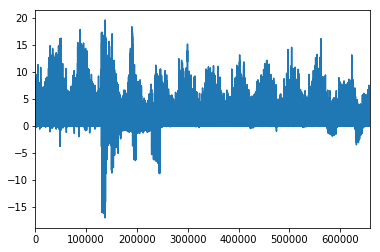

In [21]:
(wetter["air_temperature"] - wetter["windchill"]).plot()

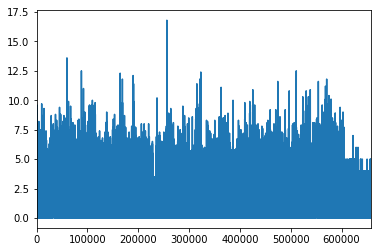

In [23]:
wetter["wind_force_avg_10min"].plot()

## Check Luftqualität

In [37]:
pd.read_csv("data/raw/luftqualitaet/ugz_luftqualitaetsmessung_seit-2012.csv", header=[1, 2, 5], sep=";").head()

Unnamed: 0_level_0 Zch_Stampfenbachstrasse                \
  Unnamed: 0_level_1          Schwefeldioxid Kohlenmonoxid   
  Unnamed: 0_level_2                   µg/m3         mg/m3   
0         01.01.2012                    1.78          0.31   
1         02.01.2012                    1.64          0.24   
2         03.01.2012                    1.40          0.24   
3         04.01.2012                    1.11          0.22   
4         05.01.2012                    0.90          0.20   

                                                                       \
  Ozon, höchstes Stundenmittel Ozon, Anzahl Stundenmittel > 120 µg/m3   
                         µg/m3                                      1   
0                        43.46                                    0.0   
1                        53.56                                    0.0   
2                        66.05                                    0.0   
3                        67.55                                    0.0   
4                        71.45                                    0.0   

                                                                    \
  Stickstoffdioxid Stickstoffmonoxid Feinstaub PM10 Lufttemperatur   
             µg/m3             µg/m3          µg/m3             °C   
0            26.54              7.83          18.04           8.12   
1            17.87              3.51           5.34           6.96   
2            19.62              5.85           6.92           6.29   
3            13.25              2.59           7.49           6.07   
4            10.11              2.23           4.92           5.02   

                       ... Zch_Schimmelstrasse             Zch_Heubeeribüel  \
  Luftfeuchte relativ  ...      Feinstaub PM10 Ozon, höchstes Stundenmittel   
                  %Hr  ...               µg/m3                        µg/m3   
0               86.90  ...               17.67                        43.75   
1               83.94  ...                5.70                        54.20   
2               67.19  ...                8.85                        65.26   
3               68.98  ...                6.57                        66.46   
4               75.59  ...                4.04                        71.11   

                                                                             \
  Ozon, Anzahl Stundenmittel > 120 µg/m3 Stickstoffdioxid Stickstoffmonoxid   
                                       1            µg/m3             µg/m3   
0                                    0.0            12.70              1.62   
1                                    0.0            10.06              1.29   
2                                    0.0            11.29              1.45   
3                                    0.0             8.77              1.11   
4                                    0.0             7.50              0.91   

        Zch_Rosengartenstrasse                                         \
  Ozon, höchstes Stundenmittel Ozon, Anzahl Stundenmittel > 120 µg/m3   
                         µg/m3                                      1   
0                          NaN                                    NaN   
1                          NaN                                    NaN   
2                          NaN                                    NaN   
3                          NaN                                    NaN   
4                          NaN                                    NaN   

                                                     
  Stickstoffdioxid Stickstoffmonoxid Feinstaub PM10  
               ppb             µg/m3          µg/m3  
0              NaN               NaN            NaN  
1              NaN               NaN            NaN  
2              NaN               NaN            NaN  
3              NaN               NaN            NaN  
4              NaN               NaN            NaN  

[5 rows x 30 columns]

In [38]:
pd.read_csv("data/raw/luftqualitaet/ugz_luftqualitaetsmessungen_1983-2011.csv", header=[1, 2, 5]).head()

Unnamed: 0_level_0 Zch_Stampfenbachstrasse                \
  Unnamed: 0_level_1          Schwefeldioxid Kohlenmonoxid   
  Unnamed: 0_level_2                   µg/m3         mg/m3   
0         1983-01-01                  133.26          4.10   
1         1983-01-02                   96.13          3.77   
2         1983-01-03                  136.22          5.76   
3         1983-01-04                   44.06          2.02   
4         1983-01-05                   16.24          1.81   

                                                                       \
  Ozon, höchstes Stundenmittel Ozon, Anzahl Stundenmittel > 120 µg/m3   
                         µg/m3                                      1   
0                          NaN                                    NaN   
1                          NaN                                    NaN   
2                          NaN                                    NaN   
3                          NaN                                    NaN   
4                          NaN                                    NaN   

                                                                    \
  Stickstoffdioxid Stickstoffmonoxid Feinstaub PM10 Lufttemperatur   
             µg/m3             µg/m3          µg/m3             °C   
0            68.80            214.73            NaN            NaN   
1            58.37            212.99            NaN            NaN   
2            49.18            356.86            NaN            NaN   
3            46.44             37.35            NaN            NaN   
4            36.69             23.79            NaN            NaN   

                       ... Zch_Schimmelstrasse             Zch_Heubeeribüel  \
  Luftfeuchte relativ  ...      Feinstaub PM10 Ozon, höchstes Stundenmittel   
                  %Hr  ...               µg/m3                        µg/m3   
0                 NaN  ...                 NaN                          NaN   
1                 NaN  ...                 NaN                          NaN   
2                 NaN  ...                 NaN                          NaN   
3                 NaN  ...                 NaN                          NaN   
4                 NaN  ...                 NaN                          NaN   

                                                                             \
  Ozon, Anzahl Stundenmittel > 120 µg/m3 Stickstoffdioxid Stickstoffmonoxid   
                                       1            µg/m3             µg/m3   
0                                    NaN              NaN               NaN   
1                                    NaN              NaN               NaN   
2                                    NaN              NaN               NaN   
3                                    NaN              NaN               NaN   
4                                    NaN              NaN               NaN   

        Zch_Rosengartenstrasse                                         \
  Ozon, höchstes Stundenmittel Ozon, Anzahl Stundenmittel > 120 µg/m3   
                         µg/m3                                      1   
0                          NaN                                    NaN   
1                          NaN                                    NaN   
2                          NaN                                    NaN   
3                          NaN                                    NaN   
4                          NaN                                    NaN   

                                                     
  Stickstoffdioxid Stickstoffmonoxid Feinstaub PM10  
               ppb             µg/m3          µg/m3  
0              NaN               NaN            NaN  
1              NaN               NaN            NaN  
2              NaN               NaN            NaN  
3              NaN               NaN            NaN  
4              NaN               NaN            NaN  

[5 rows x 30 columns]